In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [15]:
# Загрузка предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94765736/94765736 [==============================] - 7s 0us/step


In [17]:
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing import image

base_dir = 'train'

train_datagen = image_dataset_from_directory(base_dir, 
                                            image_size=(200, 200), 
                                            subset='training', 
                                            seed=1, 
                                            validation_split=0.1, 
                                            batch_size=32) 
test_datagen = image_dataset_from_directory(base_dir, 
                                           image_size=(200, 200), 
                                           subset='validation', 
                                           seed=1, 
                                           validation_split=0.1, 
                                           batch_size=32)


Found 4734 files belonging to 2 classes.
Using 4261 files for training.
Found 4734 files belonging to 2 classes.
Using 473 files for validation.


In [19]:
# Добавление пользовательских слоев для задачи бинарной классификации
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

In [20]:
# Заморозка предварительно обученных слоев (опционально)
for layer in base_model.layers:
    layer.trainable = False

In [21]:
# Компиляция модели
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Обучение модели на ваших данных
history = model.fit(
    train_datagen,
    epochs=50,  # Увеличьте количество эпох по необходимости
    validation_data=test_datagen
)

Epoch 1/50
134/134 [==============================] - 78s 568ms/step - loss: 0.0916 - accuracy: 0.9664 - val_loss: 0.0627 - val_accuracy: 0.9831
Epoch 2/50
134/134 [==============================] - 75s 557ms/step - loss: 0.0197 - accuracy: 0.9925 - val_loss: 0.0201 - val_accuracy: 0.9852
Epoch 3/50
134/134 [==============================] - 76s 562ms/step - loss: 0.0071 - accuracy: 0.9972 - val_loss: 0.0165 - val_accuracy: 0.9915
Epoch 4/50
134/134 [==============================] - 75s 558ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9915
Epoch 5/50
134/134 [==============================] - 76s 564ms/step - loss: 8.0242e-04 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9937
Epoch 6/50
134/134 [==============================] - 75s 560ms/step - loss: 4.3196e-04 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9915
Epoch 7/50
134/134 [==============================] - 75s 556ms/step - loss: 3.0504e-04 - accuracy: 1.0000 - val_loss: 0.0

In [23]:
# Оценка модели
test_loss, test_accuracy = model.evaluate(test_datagen)
print("Точность на тестовых данных:", test_accuracy)

15/15 [==============================] - 8s 492ms/step - loss: 0.0209 - accuracy: 0.9937
Точность на тестовых данных: 0.9936575293540955


In [24]:
import matplotlib.pyplot as plt

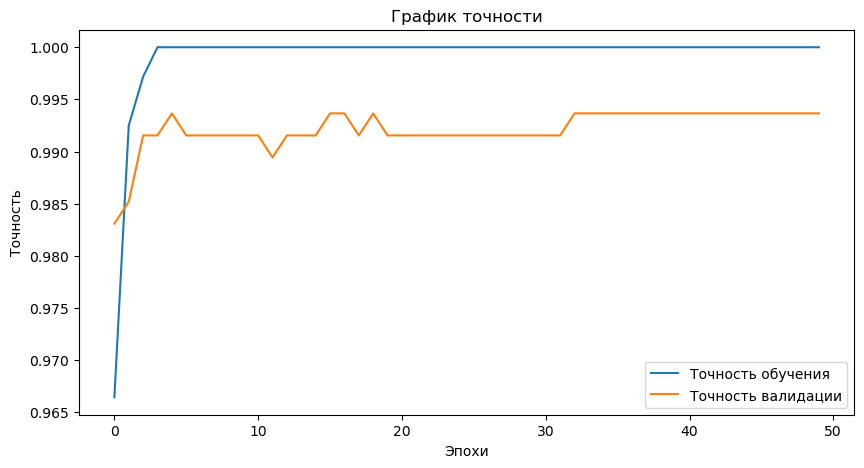

In [25]:
# График точности
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label='Точность валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.title('График точности')
plt.show()

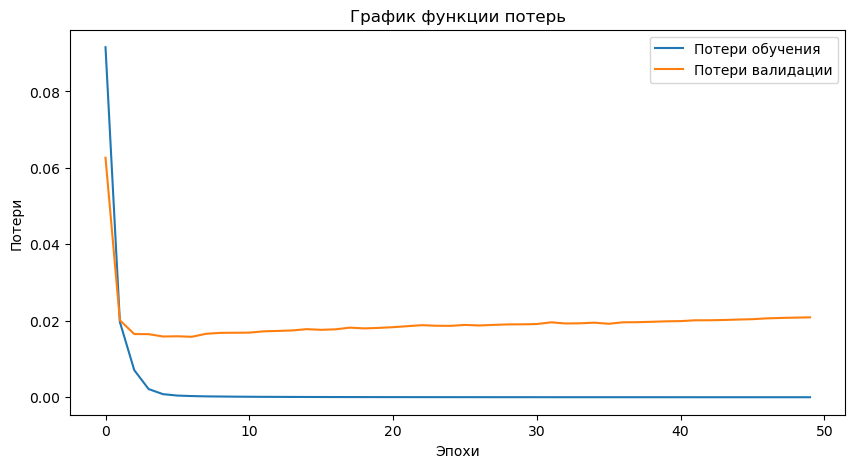

In [26]:
# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Потери обучения')
plt.plot(history.history['val_loss'], label='Потери валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.title('График функции потерь')
plt.show()


In [35]:
import os
from PIL import Image
import pandas as pd


# Папка с тестовыми изображениями
test_folder = 'test'
image_paths = [os.path.join(test_folder, filename) for filename in os.listdir(test_folder)]

# Создание списка для хранения предсказаний
predictions = []

# Перебираем изображения и предсказываем их класс
for image_path in image_paths:
    img = Image.open(image_path)
    img = img.resize((200, 200))  # Подгоните размер изображения под размер ваших данных
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.resnet.preprocess_input(img)
    img = tf.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction > 0.5:
        predictions.append('Маффин')
    else:
        predictions.append('Собака')

# Создание DataFrame для записи в CSV файл
df = pd.DataFrame({'Filename': [os.path.basename(path) for path in image_paths], 'Prediction': predictions})

# Запись в CSV файл
df.to_csv('predictions.csv', index=False)


1/1 [==============================] - 0s 51ms/step


In [36]:
df

,Filename,Prediction
0,15c6c320-a30f-468b-a614-3b71e6d5f7b6.jpg,Маффин
1,b0643d33-f95b-4748-b97b-b7192703dee9.jpg,Собака
2,bf0090aa-0047-486c-8a66-9c4ad9c70560.jpg,Маффин
3,66f51763-abaf-4bf6-aed3-7542cd57164e.jpg,Собака
4,4c64a525-f153-4ec6-b8b4-4f1a3e3e4783.jpg,Маффин
...,...,...
1178,699c8f03-af77-46e6-bd85-d6ab928bd451.jpg,Собака
1179,c807e28c-83cb-44de-8422-a728bdf07178.jpg,Маффин
1180,8d9d51b0-cda8-483a-a488-9771e3cb40e6.jpg,Маффин
1181,1a8ceea2-a7a4-4251-bc66-96fb1275317a.jpg,Собака


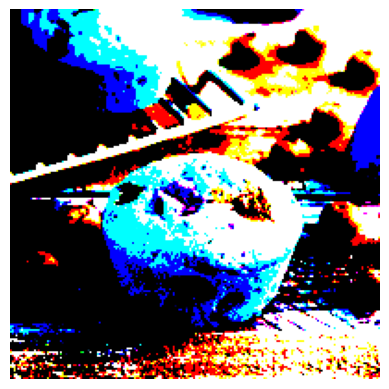

1/1 [==============================] - 0s 67ms/step
Предсказание: Мафин


In [46]:
# Путь к изображению, которое вы хотите предсказать
image_path = '1.jpg'

# Загрузка и предобработка изображения
img = Image.open(image_path)
img = img.resize((200, 200))  # Подгоните размер изображения под размер вашей модели
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.applications.resnet.preprocess_input(img)
img = tf.expand_dims(img, axis=0)

# Отображение изображения
plt.imshow(img[0])
plt.axis('off')  # Отключить оси
plt.show()

# Предсказание класса
prediction = model.predict(img)
if prediction > 0.5:
    result = 'Мафин'
else:
    result = 'Собака'

print(f"Предсказание: {result}")
